In [7]:
import numpy as np

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

In [3]:
data_folder = 'E:/cosmos-data'

In [4]:
df = pd.read_csv(f'{data_folder}/full-sample-all-environ.csv', index_col = 0)

In [9]:
df

,ID,IDs,N_1,N_2,N_3,N_4,N_5
0,105328,"[98912, 107352, 89486, 119552, 126716]",15.806091,2.968615,3.922999,4.416560,4.817184
1,105329,"[99367, 107262, 125813, 143679, 129175]",2.137290,1.547286,2.457201,3.266828,4.167507
2,105330,"[103160, 112890, 108320, 115320, 100144]",885.613152,65.905503,8.263137,9.152902,9.277347
3,105331,"[97772, 103073, 105478, 98688, 115564]",24.778566,12.809960,9.704822,9.646868,9.429629
4,105332,"[131663, 84804, 54453, 78285, 163744]",0.245998,1.167488,2.141145,3.131527,4.121687
...,...,...,...,...,...,...,...
49996,211493,"[208649, 201946, 234097, 223946, 236317]",14.426260,3.195919,2.544165,3.523323,4.520402
49997,211494,"[223504, 218605, 230637, 214141, 225708]",2.307450,2.672396,2.733395,3.602101,4.506347
49998,211495,"[222258, 231871, 184948, 255408, 180131]",2.588519,1.309166,2.171124,3.164856,4.142917
49999,211496,"[210020, 205217, 216036, 207194, 222670]",368.469909,92.095319,70.021044,55.064362,51.150925


In [33]:
df_environ = (
    df
    .assign(log_sigma = df.progress_apply(lambda row: ((np.log10(row.N_4) + np.log10(row.N_5)) / 2), axis = 1))
    .assign(sigma = df.progress_apply(lambda row: 10**((np.log10(row.N_4) + np.log10(row.N_5)) / 2), axis = 1))
)

100%|██████████| 1600032/1600032 [00:56<00:00, 28289.20it/s]


In [34]:
df_environ.log_sigma.min()

0.5419854538005765

In [35]:
df_environ.log_sigma.max()

4.181183928862328

In [36]:
df_environ.sigma.min()

3.4832564806945614

In [37]:
df_environ.sigma.max()

15176.929923469916

In [41]:
df_environ.query('sigma < 50')

,ID,IDs,N_1,N_2,N_3,N_4,N_5,log_sigma,sigma
0,105328,"[98912, 107352, 89486, 119552, 126716]",15.806091,2.968615,3.922999,4.416560,4.817184,0.663939,4.612524
1,105329,"[99367, 107262, 125813, 143679, 129175]",2.137290,1.547286,2.457201,3.266828,4.167507,0.567001,3.689787
2,105330,"[103160, 112890, 108320, 115320, 100144]",885.613152,65.905503,8.263137,9.152902,9.277347,0.964491,9.214914
3,105331,"[97772, 103073, 105478, 98688, 115564]",24.778566,12.809960,9.704822,9.646868,9.429629,0.979440,9.537630
4,105332,"[131663, 84804, 54453, 78285, 163744]",0.245998,1.167488,2.141145,3.131527,4.121687,0.555416,3.592655
...,...,...,...,...,...,...,...,...,...
49995,211492,"[236121, 219950, 239665, 190989, 179556]",0.493535,1.490127,2.442296,3.389394,4.348956,0.584254,3.839313
49996,211493,"[208649, 201946, 234097, 223946, 236317]",14.426260,3.195919,2.544165,3.523323,4.520402,0.601065,3.990844
49997,211494,"[223504, 218605, 230637, 214141, 225708]",2.307450,2.672396,2.733395,3.602101,4.506347,0.605190,4.028935
49998,211495,"[222258, 231871, 184948, 255408, 180131]",2.588519,1.309166,2.171124,3.164856,4.142917,0.558830,3.621013


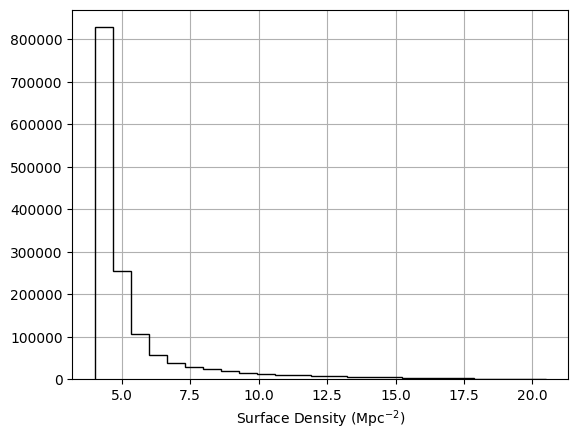

In [46]:
df_environ.query('sigma < 20').hist(
    column = 'N_5',
    bins = 25,
    histtype = 'step',
    color = 'black'
)
plt.xlabel('Surface Density (Mpc$^{-2}$)')
plt.title('')
plt.show()

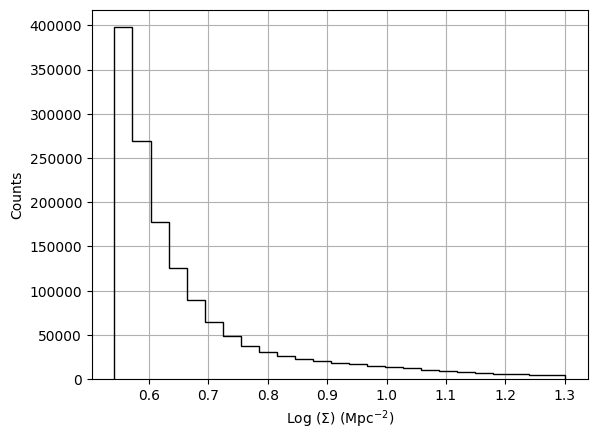

In [49]:
df_environ.query('sigma < 20').hist(
    column = 'log_sigma',
    bins = 25,
    histtype = 'step',
    color = 'black'
)
plt.xlabel('Log ($\Sigma$) (Mpc$^{-2}$)')
plt.ylabel('Counts')
plt.title('')
plt.show()